<a href="https://colab.research.google.com/github/Cin1297/Komputasi-Lanjut-dan-Big-Data-2022/blob/main/Simulasi_Model_Komuter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

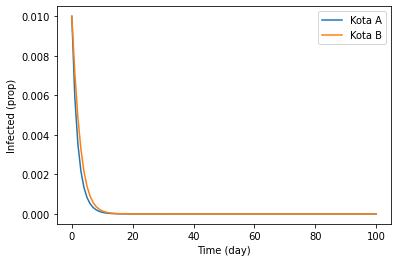

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# A = Jakarta, B = Bekasi
beta_a = 0.5 #Proporsi berhasil terinfeksi dari kota A
beta_b = 0.5 #Proporsi berhasil terinfeksi dari kota B
p = 0.11 #Proporsi komuter dari kota A
q = 0.53 #Proporsi komuter dari kota B
w = 3.5 #Na/Nb = 10 557 810 / 3 013 851 (Source: BPS 2019)
gamma = 0.97 #Proporsi kesembuhan
mu = 0.16 #Proporsi kematian
ya_0 = 0.01 #Proporsi penduduk A terinfeksi pada t=0
yb_0 = 0.01 #Proporsi penduduk B terinfeksi pada t=0
interval = 100 #in days

def model(y,t,beta_a,beta_b,p,q,gamma,mu,w):
  ya, yb = y
  dya = beta_b*p*(1-ya)*((1-q)*yb/((1-q)+p*w)) + beta_a*(1-p)*(1-ya)*(q*yb/((1-p)*w+q)) + beta_a*(1-ya)*ya - ya*(gamma+mu)
  dyb = beta_a*q*(1-yb)*((1-p)*ya*w/((1-p)*w+q)) + beta_b*(1-q)*(1-yb)*(p*ya*w/((1-q)+p*w)) + beta_b*(1-yb)*yb - yb*(gamma+mu)
  return dya, dyb

timesteps = np.linspace(0, interval, interval+1) #100-days
sol = odeint(model, (ya_0,yb_0), timesteps, args=(beta_a,beta_b,p,q,gamma,mu,w))
plt.plot(timesteps,sol)
plt.xlabel('Time (day)')
plt.ylabel('Infected (prop)')
plt.legend(['Kota A','Kota B'])
plt.show()